# PSD

Info about PSD stuff comes here

## LIGO & VIRGO design sensitivity noise curves

Various PSD files for different GW detectors (current and future) can be found

- In the LIGO Gitlab [here](https://git.ligo.org/lscsoft/bilby/-/tree/master/bilby/gw/detector/noise_curves) (need to be logged in to git.ligo.org). 
- Publicly available: [here](https://github.com/lscsoft/bilby/tree/master/bilby/gw/detector/noise_curves).

- For aLIGO, more information can be found [here](https://dcc.ligo.org/LIGO-T2000012/public).
- For AdV, more information can be found [here](https://dcc.ligo.org/LIGO-P1200087-v42/public), with a paper with more explanation.

Below, we show the PSDs for the current detectors at design sensitivity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lalsimulation as lalsim
import bilby
params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

### Using lalsimulation

Note: you can also get the same noise curves with lalsimulation, although reading from the file is a bit faster.
(For some reason, this does not work if I give the numpy array, so I am making use of a cumbersome for loop)

In [2]:
f_min = 20
f_max = 2048
f = np.arange(f_min, f_max, 0.1)
result = np.array([lalsim.SimNoisePSDaLIGOZeroDetHighPower(f_val) for f_val in f])

### From external files

In [3]:
def load_psd_file(filename):
    data = np.loadtxt(filename)
    return data[:,0], data[:,1]

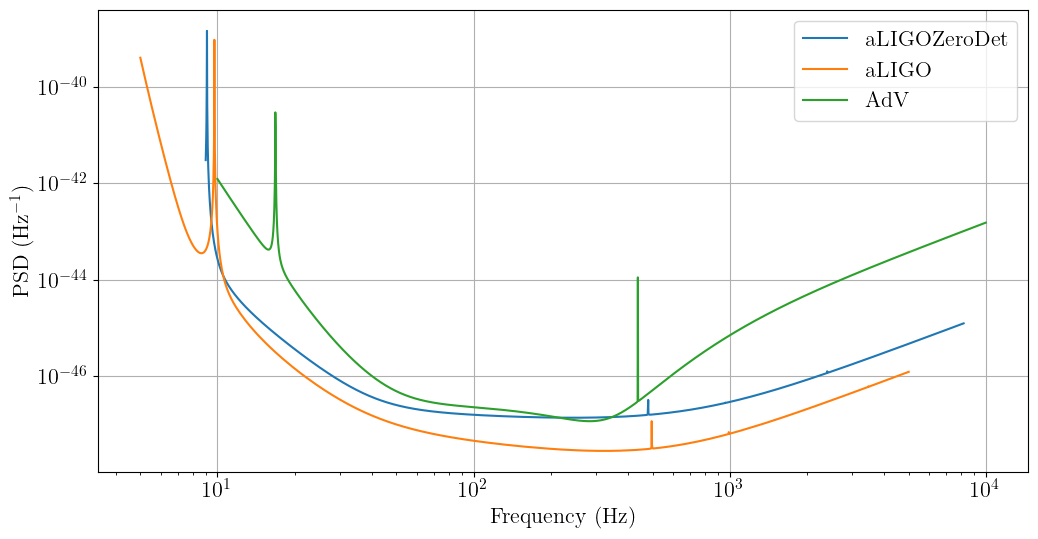

In [4]:
f_ligo_zero_det, psd_ligo_zero_det = load_psd_file("./aLIGO_ZERO_DET_high_P_psd.txt")
f_ligo, psd_ligo = load_psd_file("./AplusDesign.txt")
psd_ligo = psd_ligo ** 2
f_virgo, psd_virgo = load_psd_file("./AdV_psd.txt")

plt.figure(figsize=(12,6))
# plt.loglog(f, result, label="LALSimulator")
plt.loglog(f_ligo_zero_det, psd_ligo_zero_det, label="aLIGOZeroDet")
plt.loglog(f_ligo, psd_ligo, label="aLIGO")
plt.loglog(f_virgo, psd_virgo, label="AdV")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (Hz$^{-1}$)")
plt.legend()
plt.show()


### From bilby

You can follow some bilby examples that show you how to load the interferometers and their PSDs such as [this one](https://github.com/lscsoft/bilby/blob/master/examples/gw_examples/injection_examples/bns_eos_example.py)

- More information about the PSD calculations can be found in `bilby/gw/detector/psd.py`
- Documentation about the `InterferometerList` used below can be found in `bilby/gw/detector/networks.py`
- Contrary to the files shown above, bilby uses a different PSD for LIGO, namely `aLIGO_O4_high_asd.txt`
- Information about how empty interferometers are set up, check `bilby/gw/detector/networks.py`, namely the `get_empty_interferometer` function

In [5]:
detector_names = ["H1", "L1", "V1"]
# ifos = [bilby.gw.detector.get_empty_interferometer(name) for name in detector_names]
ifos = bilby.gw.detector.InterferometerList(detector_names)
ifos

[Interferometer(name='H1', power_spectral_density=PowerSpectralDensity(psd_file='None', asd_file='/Users/Woute029/miniconda3/envs/gw-get-started/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), minimum_frequency=20.0, maximum_frequency=2048.0, length=4.0, latitude=46.45514666666667, longitude=-119.4076571388889, elevation=142.554, xarm_azimuth=125.9994, yarm_azimuth=215.9994, xarm_tilt=-0.0006195, yarm_tilt=1.25e-05),
 Interferometer(name='L1', power_spectral_density=PowerSpectralDensity(psd_file='None', asd_file='/Users/Woute029/miniconda3/envs/gw-get-started/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), minimum_frequency=20.0, maximum_frequency=2048.0, length=4.0, latitude=30.562894333333332, longitude=-90.77424038888887, elevation=-6.574, xarm_azimuth=197.7165, yarm_azimuth=287.7165, xarm_tilt=-0.0003121, yarm_tilt=-0.0006107),
 Interferometer(name='V1', power_spectral_density=PowerSpectralDensity(psd_file='A

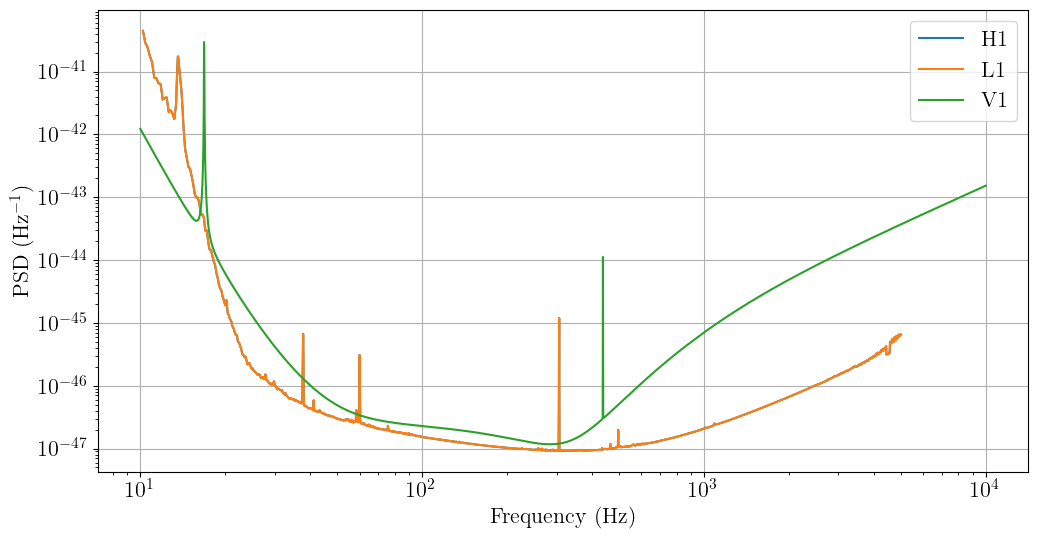

In [6]:
# Make the plot
plt.figure(figsize=(12,6))
for ifo in ifos:
    psd = ifo.power_spectral_density
    f_values = psd.frequency_array
    psd_values = psd.psd_array
    plt.loglog(f_values, psd_values, label=ifo.name)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (Hz$^{-1}$)")
plt.legend()
plt.show()

# ARCHIVE

TODO delete this?

In [7]:
sampling_frequency = int(f_max / 2)
duration = 32
geocent_time = 1126259642.413
start_time = geocent_time - duration + 2

interferometers = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
for interferometer in interferometers:
    interferometer.minimum_frequency = 20
interferometers.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, 
                                                              duration=duration,
                                                              start_time=start_time)